In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data from NYC taxis in 2020.  Add columns
# "day", "month" and "year". Keep only those data points in which the
# year is 2020 and the month is either January or July.  

filenames = ['../data/nyc_taxi_2020-01.csv', '../data/nyc_taxi_2020-07.csv']

all_dfs = [pd.read_csv(one_filename,
           usecols=['tpep_pickup_datetime', 'passenger_count', 'trip_distance',
                    'total_amount'],
           parse_dates=['tpep_pickup_datetime'])
           for one_filename in filenames]

df = pd.concat(all_dfs)

df['year'] = df['tpep_pickup_datetime'].dt.year
df['month'] = df['tpep_pickup_datetime'].dt.month
df['day'] = df['tpep_pickup_datetime'].dt.day

df = df.loc[(df['month'].isin([1, 7])) & 
            (df['year'] == 2020)]

In [6]:
# Set a new numeric range index, numbered starting at 0
df = df.reset_index(drop=True)

In [7]:
# Assign df to a random sample of 1% of the elements in df
np.random.seed(0)
df_1p = df.sample(frac=0.01)

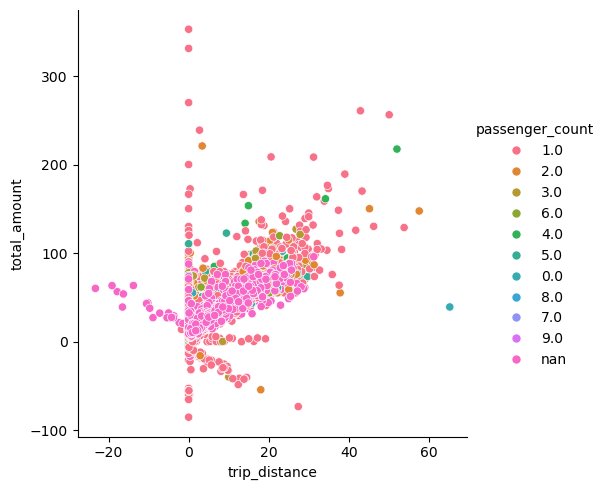

In [9]:
# Using Seaborn, create a scatter plot in which the x axis shows trip distance
# and the y axis shows total amount, with the plot colors set by passenger_count.
# Only plot a random sample of 1% of the data, to avoid time and memory overload.

sns.relplot(x='trip_distance', 
            y='total_amount', 
            data=df_1p,
            hue=df['passenger_count'].astype(str))

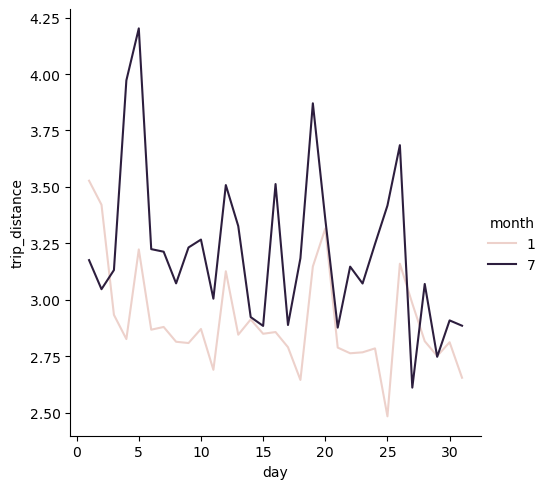

In [11]:
# Create a line plot showing the distance traveled
# on each day of January and July.  The x axis should be the day
# of the month, and the y axis will be the average trip distance. 
# There should be two lines, one for each month.  Remove the confidence
# interval shadow from around each plot line.

sns.relplot(x='day', 
            y='trip_distance',
            kind='line',
            data=df_1p,
            hue='month',
            errorbar=None)

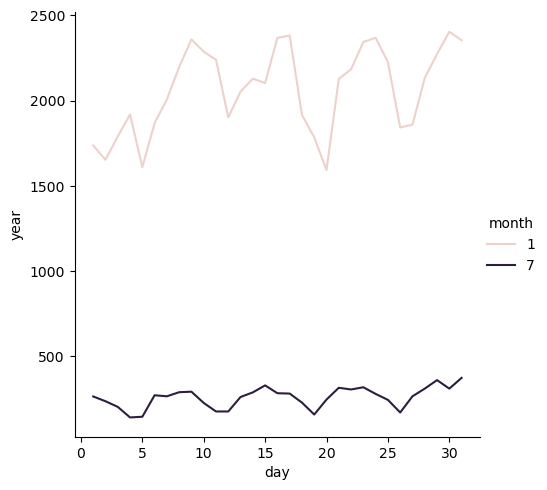

In [15]:
# Using Seaborn, show the number of trips taken
# on each day (1-31) of both months (January and July).
# The x axis should refer to the day of the month,
# and the y axis should show the number of trips taken.

sns.relplot(x='day', 
            y='year', 
            hue='month', 
            kind='line', 
            data=df_1p.groupby(['month', 'day'])[['year']].count().reset_index(), errorbar=None)

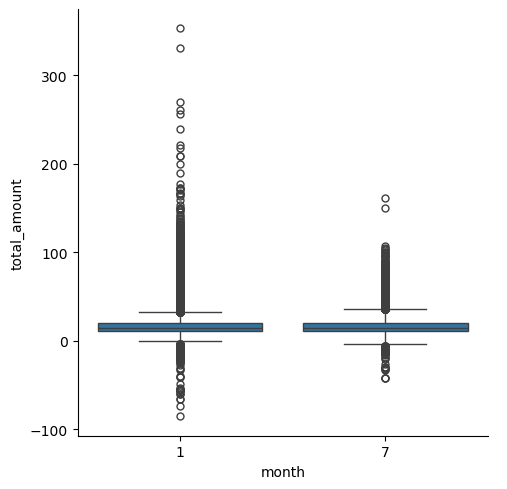

In [19]:
# Using Seaborn, create a box of total_amount,
# with one plot for each month.

sns.catplot(x='month', y='total_amount', data=df_1p, kind='box')

In [20]:
df_1p.groupby('month')['total_amount'].mean()

month
1    18.594818
7    18.608803
Name: total_amount, dtype: float64